
<h1 style="text-align: center;">CIÊNCIA DE DADOS</h1>
<h1 style="text-align: center;">Roteiro de Atividade Prática - PROFESSOR</h1>
<br>
<br>

Nome: ______________________________________________________________________________________      

Turma: ______________


**Componente:** Aprendizagem de Máquina
<br>
**Unidade Curricular:** Modelos, Algoritmos e Estimadores
<br>
**Tema da Semana:** K-Means
<br>


## Aula 4: Exercícios de fixação - RESPOSTAS

## Tarefa
- Executem o código abaixo.

- Se as bibliotecas não tiverem instaladas, instale-as.

- Acompanhem as instruções do código.

- Completem o código faltante '#TO DO' seguindo as instruções fornecidas.

### 1) Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

### 2) Criar um base de dados aleatório com 500 registros e 4 features

In [2]:
X, _ = make_blobs(n_samples=1000, centers=8, n_features=4, random_state=42)

### 3) Normalizar os dados

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 4) Determinar o número ideal de clusters usando o método do cotovelo

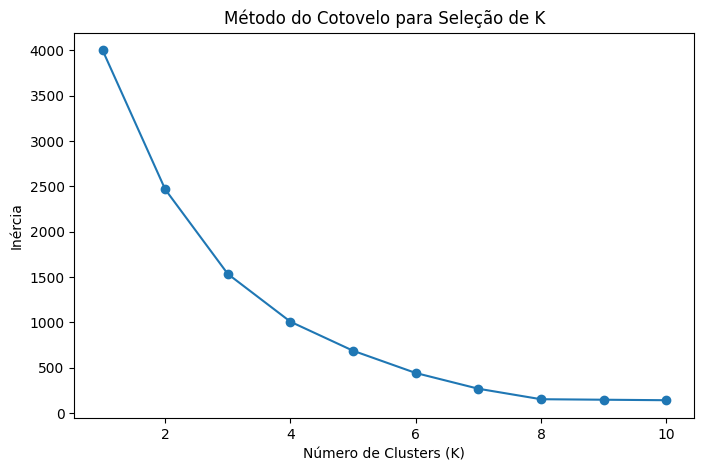

In [4]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotar o método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Seleção de K')
plt.show()

### 5) Determinar o melhor método de inicialização

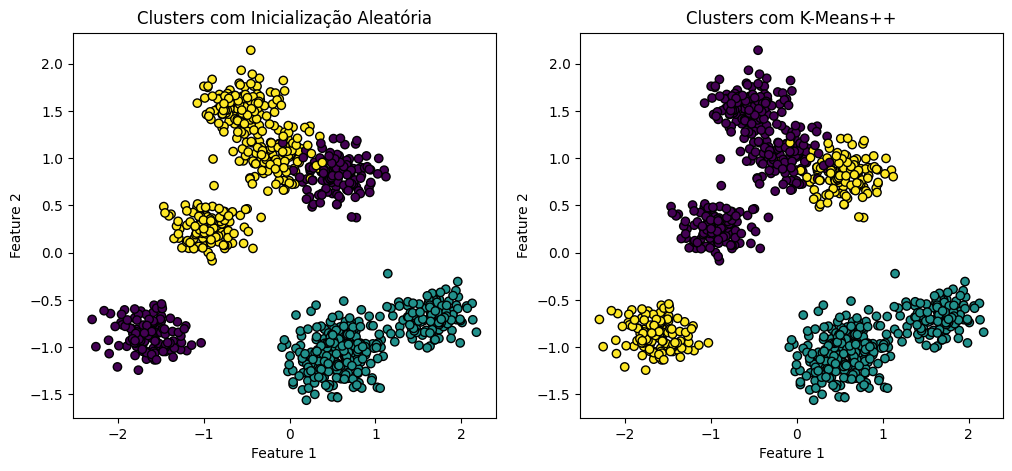

In [5]:
kmeans_random = KMeans(n_clusters=3, init='random', random_state=42, n_init=10)
kmeans_plus = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)

# Treinar os modelos
y_kmeans_random = kmeans_random.fit_predict(X_scaled)
y_kmeans_plus = kmeans_plus.fit_predict(X_scaled)

# Comparação dos clusters
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Inicialização Aleatória
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans_random, cmap='viridis', edgecolors='k')
axes[0].set_title("Clusters com Inicialização Aleatória")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")

# K-Means++
axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans_plus, cmap='viridis', edgecolors='k')
axes[1].set_title("Clusters com K-Means++")
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")

plt.show()


### 6) Determinar o melhor método de parada

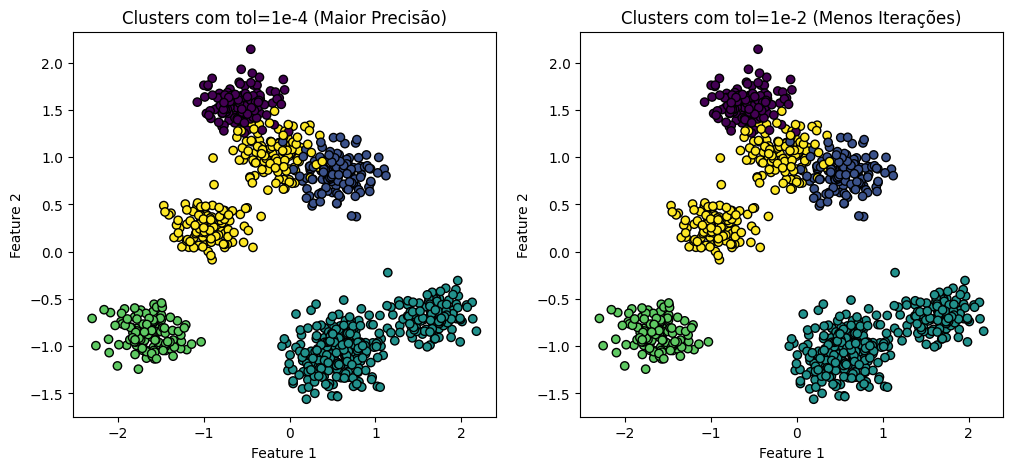

In [6]:
kmeans_tol_1e_4 = KMeans(n_clusters=5, init='k-means++', random_state=42, tol=1e-4, n_init=10)
kmeans_tol_1e_2 = KMeans(n_clusters=5, init='k-means++', random_state=42, tol=1e-2, n_init=10)

# Treinar os modelos
y_kmeans_tol_1e_4 = kmeans_tol_1e_4.fit_predict(X_scaled)
y_kmeans_tol_1e_2 = kmeans_tol_1e_2.fit_predict(X_scaled)

# Comparação dos clusters com diferentes critérios de parada
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Tolerância = 1e-4 (mais rigoroso)
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans_tol_1e_4, cmap='viridis', edgecolors='k')
axes[0].set_title("Clusters com tol=1e-4 (Maior Precisão)")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")

# Tolerância = 1e-2 (menos rigoroso)
axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans_tol_1e_2, cmap='viridis', edgecolors='k')
axes[1].set_title("Clusters com tol=1e-2 (Menos Iterações)")
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")

plt.show()
